# 1時間後のEUR/USDの値段を予測する

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [3]:
sys.path.append('../')

from lib import lib

In [4]:
li_currency = ["USDJPY","EURJPY","EURUSD","GBDJPY","CADJPY","CHFJPY","GBDUSD","USDCHF","SEKJPY","NOKJPY",
"EURGBP","USDCAD","TRYJPY","ZARJPY","MXNJPY","TRYUSD","EURTRY","RUBJPY","AUDJPY","NZDJPY",
"AUDUSD","NZDUSD","EURAUD","GBPAUD","AUDCAD","EURNZD","AUDNZD","CNYJPY","HKDJPY","SGDJPY"]

In [5]:
CURRENCY = "EURUSD"
PERIOD = 6 # 予測の間隔
PERIOD2 = 6 # 変化の間隔
PIP = 0.0005

In [6]:
target, day = lib.makeTarget(CURRENCY)
dayweek = list(map(lib.dayweek,day))
dayhour = list(map(lib.dayhour,day))

In [7]:
data = lib.makeData(li_currency).values
diffs = lib.diffData(data,PERIOD2)
data = data[PERIOD2:]
data = np.concatenate([data,diffs],1)[max(PERIOD-PERIOD2,0):]

In [8]:
target = lib.diffTarget(target,PERIOD)[max(PERIOD2-PERIOD,0):]

In [9]:
len(data)

4657

In [10]:
len(target)

4657

In [11]:
size = len(target)
dayweek = dayweek[max(PERIOD2,PERIOD):]
dayhour = dayhour[max(PERIOD2,PERIOD):]

In [12]:
data, target = lib.checkDay(data,target,dayweek,dayhour,size)
data = np.array(data)

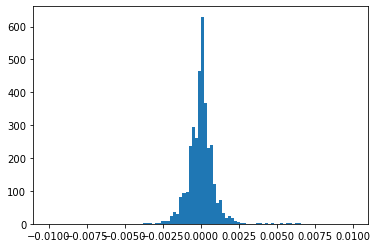

In [14]:
plt.hist(target, range=(-0.01, 0.01), bins=100);

In [15]:
target2 = [lib.highlow(i,PIP) for i in target]
target3 = [lib.highlow2(i,PIP) for i in target]
target4 = [lib.highlow3(i,PIP) for i in target]

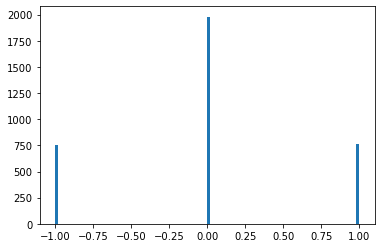

In [16]:
plt.hist(target2, range=(-1, 1), bins=100);

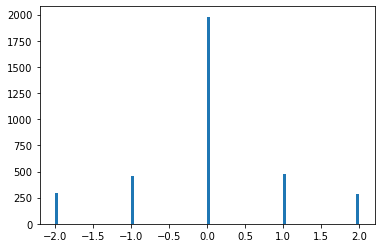

In [17]:
plt.hist(target3, range=(-2, 2), bins=100);

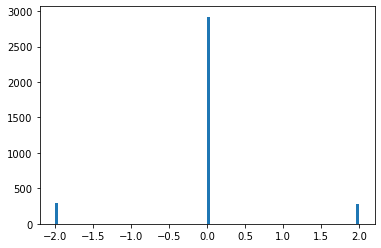

In [18]:
plt.hist(target4, range=(-2, 2), bins=100);

# データ成型は終了

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import svm

In [20]:
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

## 多層パーセプトロンで予測を行う

In [21]:
clf = MLPClassifier(hidden_layer_sizes = (128,128), solver = "sgd", max_iter = 10000)
X_train, X_test, y_train, y_test = train_test_split(data, target2, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.5485714285714286
[[ 16  61   0]
 [  9 166  22]
 [  0  66  10]]


In [22]:
clf = MLPClassifier(hidden_layer_sizes = (128,128), solver = "sgd", max_iter = 10000)
X_train, X_test, y_train, y_test = train_test_split(data, target3, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.5428571428571428
[[  1   5  14   0   0]
 [  5   5  46   1   0]
 [  0   8 173  16   0]
 [  0   0  43   7   0]
 [  0   1  14   7   4]]


In [23]:
clf = MLPClassifier(hidden_layer_sizes = (128,128), solver = "sgd", max_iter = 10000)
X_train, X_test, y_train, y_test = train_test_split(data, target4, test_size=300, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.8366666666666667
[[  1  18   0]
 [  7 240  15]
 [  0   9  10]]


0.001521245756095201
[[ 1.         -0.04528802]
 [-0.04528802  1.        ]]


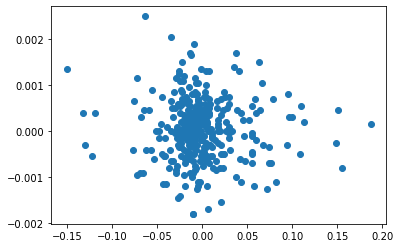

In [24]:
clf = MLPRegressor(hidden_layer_sizes = (128,128), solver = "sgd", max_iter = 10000)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(mean_squared_error(predict,correct))
print(np.corrcoef(predict, correct))
plt.scatter(predict, correct)

0.003740882322260633
[[1.00000000e+00 2.38755565e-04]
 [2.38755565e-04 1.00000000e+00]]


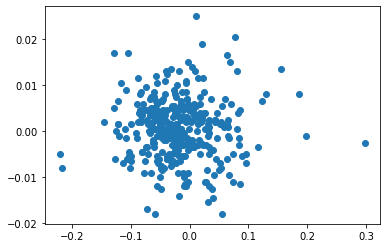

In [25]:
clf = MLPRegressor(hidden_layer_sizes = (128,128), solver = "sgd", max_iter = 10000)
X_train, X_test, y_train, y_test = train_test_split(data, [i * 10 for i in target], test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(mean_squared_error(predict,correct))
print(np.corrcoef(predict, correct))
plt.scatter(predict, correct)

5.131257185074536e-07
[[1.         0.71144742]
 [0.71144742 1.        ]]


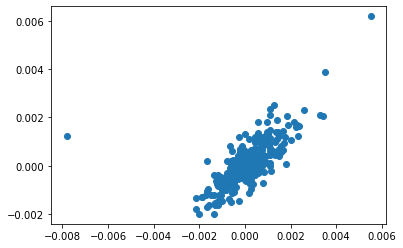

In [26]:
clf = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=0)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(mean_squared_error(predict,correct))
print(np.corrcoef(predict, correct))
plt.scatter(predict, correct)

## サポートベクターマシンで予測を行う

In [27]:
clf = svm.LinearSVC(loss='hinge', C=1.0,class_weight='balanced', random_state=0,max_iter=10000)
X_train, X_test, y_train, y_test = train_test_split(data, target2, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.5657142857142857
[[ 17  56   4]
 [ 23 159  15]
 [  8  46  22]]


C:\Users\Takumi Inui\Anaconda\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [28]:
clf = svm.LinearSVC(loss='hinge', C=1.0,class_weight='balanced', random_state=0,max_iter=10000)
X_train, X_test, y_train, y_test = train_test_split(data, target3, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.5057142857142857
[[  2   2  16   0   0]
 [  7  15  35   0   0]
 [  9  29 149   3   7]
 [  0   5  34   0  11]
 [  1   5   8   1  11]]


C:\Users\Takumi Inui\Anaconda\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [29]:
clf = svm.LinearSVC(loss='hinge', C=1.0,class_weight='balanced', random_state=0,max_iter=10000)
X_train, X_test, y_train, y_test = train_test_split(data, target4, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.7085714285714285
[[  1  19   0]
 [ 38 235  31]
 [  2  12  12]]


C:\Users\Takumi Inui\Anaconda\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## ランダムフォレストで予測を行う

In [30]:
clf = RandomForestClassifier(max_depth=20, n_estimators = 40)
X_train, X_test, y_train, y_test = train_test_split(data, target2, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.6
[[ 16  57   4]
 [  5 180  12]
 [  3  59  14]]


In [31]:
clf = RandomForestClassifier(max_depth=20, n_estimators = 40)
X_train, X_test, y_train, y_test = train_test_split(data, target3, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.5657142857142857
[[  0   0  19   1   0]
 [  2   2  53   0   0]
 [  0   1 194   2   0]
 [  0   0  47   1   2]
 [  0   0  20   5   1]]


In [32]:
clf = RandomForestClassifier(max_depth=20, n_estimators = 40)
X_train, X_test, y_train, y_test = train_test_split(data, target4, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.8685714285714285
[[  0  20   0]
 [  0 304   0]
 [  0  26   0]]


3.3579200619740033e-07
[[1.         0.77754008]
 [0.77754008 1.        ]]


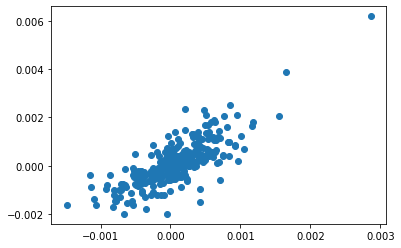

In [33]:
clf = RandomForestRegressor(n_estimators=9, max_depth=9, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=0)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(mean_squared_error(predict,correct))
print(np.corrcoef(predict, correct))
plt.scatter(predict, correct)

3.473094399700829e-05
[[1.         0.76781175]
 [0.76781175 1.        ]]


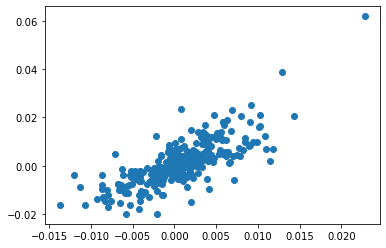

In [34]:
clf = RandomForestRegressor(n_estimators=9, max_depth=9, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(data, [i * 10 for i in target], test_size=0.1, random_state=0)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(mean_squared_error(predict,correct))
print(np.corrcoef(predict, correct))
plt.scatter(predict, correct)

## Adaboostで予測を行う

In [35]:
clf = AdaBoostClassifier()
X_train, X_test, y_train, y_test = train_test_split(data, target2, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.6657142857142857
[[ 48  28   1]
 [ 30 143  24]
 [  8  26  42]]


In [36]:
clf = AdaBoostClassifier()
X_train, X_test, y_train, y_test = train_test_split(data, target3, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.6085714285714285
[[  2  13   5   0   0]
 [  5  18  34   0   0]
 [  1   5 172  17   2]
 [  0   1  32  13   4]
 [  0   0   3  15   8]]


In [37]:
clf = AdaBoostClassifier()
X_train, X_test, y_train, y_test = train_test_split(data, target4, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.8257142857142857
[[  4  16   0]
 [ 16 270  18]
 [  0  11  15]]


1.8992742931061743e-05
[[1.         0.88371259]
 [0.88371259 1.        ]]


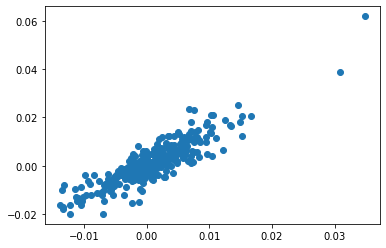

In [38]:
clf = GradientBoostingRegressor(random_state=1, n_estimators=100, max_depth=5)
X_train, X_test, y_train, y_test = train_test_split(data, [i * 10 for i in target], test_size=0.1, random_state=0)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(mean_squared_error(predict,correct))
print(np.corrcoef(predict, correct))
plt.scatter(predict, correct)